<a href="https://colab.research.google.com/github/tmckim/materials-sp24-colab/blob/main/lec_demos/lec15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Before you start - Save this notebook!

When you open a new Colab notebook from the WebCampus (like you hopefully did for this one), you cannot save changes. So it's  best to store the Colab notebook in your personal drive `"File > Save a copy in drive..."` **before** you do anything else.

The file will open in a new tab in your web browser, and it is automatically named something like: "**Copy of lec15.ipynb**". You can rename this to just the title of the assignment "**lec15.ipynb**". Make sure you do keep an informative name (like the name of the assignment) so that you know which files to submit back to WebCampus for grading! More instructions on this are at the end of the notebook.


**Where does the notebook get saved in Google Drive?**

By default, the notebook will be copied to a folder called “Colab Notebooks” at the root (home directory) of your Google Drive. If you use this for other courses or personal code notebooks, I recommend creating a folder for this course and then moving the assignments AFTER you have completed them. <br>

I also recommend you give the folder where you save your notebooks^ a different name than the folder we create below that will store the notebook resources you need each time you work through a course notebook. This includes any data files you will need, links to the images that appear in the notebook, and the files associated with the autograder for answer checking.<br>
You should select a name other than '**NS499-DataSci-course-materials**'. <br>
This folder gets overwritten with each assignment you work on in the course, so you should **NOT** store your notebooks in this folder that we use for course materials! <br><br>For example, you could create a folder called 'NS499-**notebooks**' or something along those lines.
___

### We will now do the setup steps as separate cells to help with issues finding files in google drive/colab. <br> If you restart colab, you must rerun all **5** steps in each of these cells!

In [ ]:
# Step 1
# Setup and add files needed to access gdrive
from google.colab import drive                                   # these lines mount your gdrive to access the files we import below
drive.mount('/content/gdrive', force_remount=True)

In [3]:
# Step 2
# Change directory to the correct location in gdrive (modified way to do this from before)
import os
os.chdir('/content/gdrive/MyDrive/NS499-DataSci-course-materials/')

In [ ]:
# Step 3
# Remove the files that were previously there- we will replace with all the old + new ones for this assignment
!rm -r materials-sp24-colab

In [ ]:
# Step 4
# These lines clone (copy) all the files you will need from where I store the code+data for the course (github)
# Second part of the code copies the files to this location and folder in your own gdrive
!git clone https://github.com/tmckim/materials-sp24-colab '/content/gdrive/My Drive/NS499-DataSci-course-materials/materials-sp24-colab/'

In [4]:
# Step 5
# Change directory into the folder where the resources for this assignment are stored in gdrive (modified way from before)
os.chdir('/content/gdrive/MyDrive/NS499-DataSci-course-materials/materials-sp24-colab/lec_demos/')

In [5]:
# Import packages and other things needed
# Don't change this cell; Just run this cell
# If you restart colab, make sure to run this cell again after the first ones above^

from datascience import *
import numpy as np
import warnings
warnings.simplefilter(action='ignore',category=np.VisibleDeprecationWarning)

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
plt.rcParams["patch.force_edgecolor"] = True

## Learning Objectives ##

- use simulation to conduct hypothesis testing
- review simulation steps and process
- compare two samples using A/B testing


# Comparing Two Samples

In [6]:
# Read in table of data
births = Table.read_table('baby.csv')

In [ ]:
# birth weight in ounces
# days in womb
# age of mother
# height of mother
# weight of mother- pounds
# mother smoking status

In [ ]:
births

In [7]:
# Select subset of data we will work with
smoking_and_birthweight = births.select('Maternal Smoker', 'Birth Weight')

In [ ]:
# Find how many individuals in each category
...

In [ ]:
#@title Hidden Solution
smoking_and_birthweight.group('Maternal Smoker')

In [ ]:
# Plot the distributions of the data
smoking_and_birthweight.hist('Birth Weight')

In [ ]:
#@title Hidden Solution
smoking_and_birthweight.hist('Birth Weight', group='Maternal Smoker')

# Test Statistic

Question: What values of our statistic are in favor of the alternative: positive or negative? <br>

This depends on our alternative hypothesis, and which order we plan to do the subtraction. <br><br>

**Alternative Hypothesis**: In the population, the babies of the mothers who smoked weigh less, on average, than the babies of the non-smokers
**Subtraction**: smoking group minus non-smoking group.

In [ ]:
# Return averages
means_table = smoking_and_birthweight.group('Maternal Smoker', np.average)
means_table

In [ ]:
# Use the column we want and calculate the difference
means = means_table.column(1)
observed_difference = means.item(1) - means.item(0)
observed_difference

In [ ]:
# Define a function using what we already did above so we can easily repeat this process many times
def difference_of_means(table, numeric_label, category_label):
    """Takes: name of table, column label of numerical variable,
    column label of group-label variable
    Returns: Difference of means of the two groups"""

    #table with the two relevant columns
    reduced = ...

    # table containing group means
    means_table = ...

    # array of group means
    means = ...

    return means.item(1) - means.item(0)

In [8]:
#@title Hidden Solution
def difference_of_means(table, numeric_label, category_label):
    """Takes: name of table, column label of numerical variable,
    column label of group-label variable
    Returns: Difference of means of the two groups"""

    #table with the two relevant columns
    reduced = table.select(category_label, numeric_label)

    # table containing group means
    means_table = reduced.group(category_label, np.average)

    # array of group means
    means = means_table.column(1)

    return means.item(1) - means.item(0)

In [ ]:
# Run the function
# Function inputs:
    # table = births
    # numeric_label = Birth Weight column
    # category_label = Maternal Smoker column
difference_of_means(births, 'Birth Weight', 'Maternal Smoker')

Now we need to simulate. But how do we do this? <br>
Simulate another set of people like this, but assume the distributions are the same between the weight differences of the groups. <br>
Seems complicated, and in the past, we had the population data in the previous examples. We don't have that info here.

# Random Permutation (Shuffling)

In [ ]:
# An example table
letters = Table().with_column('Letter', make_array('a', 'b', 'c', 'd', 'e'))

In [ ]:
# Shuffles the entire table, but you can get repeats
letters.sample()

In [ ]:
# Ensure we get unique permutation
letters.sample(with_replacement = False)

In [ ]:
# Show them together
letters.with_column('Shuffled', letters.sample(with_replacement = False).column(0))

# Simulation Under the Null Hypothesis

In [ ]:
# Here is our table again
smoking_and_birthweight

In [ ]:
# Shuffle Maternal Smoker labels, but keep the Birth Weights the same
shuffled_labels = smoking_and_birthweight.sample(with_replacement=False).column('Maternal Smoker')

In [ ]:
# Create new table that contains original and new shuffled categories
original_and_shuffled = smoking_and_birthweight.with_column('Shuffled Label', shuffled_labels)

In [ ]:
# Check it out
original_and_shuffled

In [ ]:
# Now we can call the function from above, but use the shuffled label instead of original
difference_of_means(original_and_shuffled, 'Birth Weight', 'Shuffled Label')

In [ ]:
# Compare to running it with our original table values
difference_of_means(original_and_shuffled, 'Birth Weight', 'Maternal Smoker')

# Permutation Test

In [9]:
# Function for our simulation and calculate the test statistic
def one_simulated_difference(table, numeric_label, category_label):
    """Takes: name of table, column label of numerical variable,
    column label of group-label variable
    Returns: Difference of means of the two groups after shuffling labels"""

    # array of shuffled labels
    shuffled_labels = table.sample(with_replacement = False).column(category_label)

    # table of numerical variable and shuffled labels
    shuffled_table = table.select(numeric_label).with_column('Shuffled Label', shuffled_labels)  # this is our simulated data

    return difference_of_means(shuffled_table, numeric_label, 'Shuffled Label')   # computes and returns the test statistic

In [ ]:
# Test the function
one_simulated_difference(births, 'Birth Weight', 'Maternal Smoker')

In [ ]:
# Final step: repeat this many times using a for loop
differences = ...

for ... in ...(2500):
    new_difference = ...
    differences = ...

In [10]:
#@title Hidden Solution
differences = make_array()

for i in np.arange(2500):
    new_difference = one_simulated_difference(births, 'Birth Weight', 'Maternal Smoker')
    differences = np.append(differences, new_difference)

In [ ]:
# Create a table from the data array and plot the distribution
diff_tbl = Table().with_column('Simulated Differences', differences)
diff_tbl.hist()

print('Observed Difference:', observed_difference)
plt.title('Prediction Under the Null Hypothesis');

In [ ]:
# Calculating the p-value

p_val = diff_tbl.where('Simulated Differences', are.below(observed_difference)).num_rows / 2500
p_val

In [ ]:
# Calculating the p-value another way
p_value = np.count_nonzero(differences <= observed_difference) / 2500
p_value

In [ ]:
#@title Hidden Text
#How often does the difference get very large? It rarely does here under simulation.
#Our observed values was -9.266, which would be way off the chart.
#Low (negative) values are evidence for the alternative. So we want to know what percent of values lie beyond that observed value.
#No part of histogram goes out that far- this means the p-value is 0.
#Conclude: Data is consistent with alternative. Babies born to mothers who smoked weighed less than babies of nonsmokers in the population.

Does this imply causation?

In [ ]:
# Review other values in the table
births.group('Maternal Smoker', np.average)

# Randomized Control Experiment

In [ ]:
# Botox treatment for chronic pain
# 1 - improvement in outcome (pain)
# 0 - no change in outcome (pain)
botox = Table.read_table('bta.csv')
botox.show()

In [ ]:
# What are the unique combinations of all of these values
...

In [ ]:
#@title Hidden Solution
botox.pivot('Result','Group')

In [ ]:
# Average value of improvement for the outcome variable
...

In [ ]:
#@title Hidden Solution
botox.group('Group', np.average)

# Testing the Hypothesis

In [ ]:
# Use the function we defined above to calculate the difference
# We have a different table, and input columns
observed_diff = difference_of_means(botox, 'Result', 'Group')
observed_diff

In [ ]:
# Run our permutation function
one_simulated_difference(botox, 'Result', 'Group')

In [ ]:
# Simulate many times
simulated_diffs = ...

for ... in ...(10000):
    sim_diff = ...
    simulated_diffs = ...

In [25]:
#@title Hidden Solution
simulated_diffs = make_array()

for i in np.arange(10000):
    sim_diff = one_simulated_difference(botox, 'Result', 'Group')
    simulated_diffs = np.append(simulated_diffs, sim_diff)

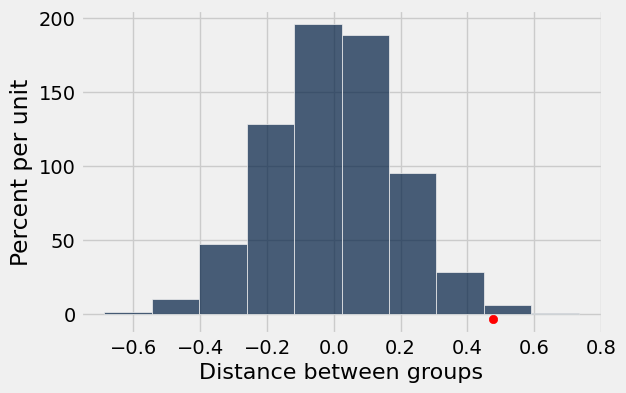

In [27]:
# Create a table and plot the distribution
col_name = 'Distance between groups'
Table().with_column(col_name, simulated_diffs).hist(col_name)

plt.scatter(observed_diff, -0.03,c='red');

In [ ]:
# Calculate p-value- threshold is 1% (0.01)
sum(simulated_diffs >= observed_diff)/len(simulated_diffs)

In [ ]:
# The above code is similar to using np.count_nonzero
np.count_nonzero(simulated_diffs >= observed_diff) / len(simulated_diffs)

In [ ]:
#@title Hidden Text
#treatment minus control- positive/high values are evidence for alternative
#p-value is smaller than cutoff- data is consistent with alternative.
#Treatment causes pain to improve- we can conclude this due to random assignment